In [206]:
%matplotlib inline

import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import roc_auc_score, accuracy_score

import pickle

In [151]:
df = pd.read_csv('dados_alunos.csv')

In [152]:
df.columns

Index(['CD_ALUNO', 'CD_ESCOLA', 'DTNASC', 'SEXO', 'RENDIMENTO', 'DEF1', 'DEF2',
       'DEF3', 'DEF4', 'DEF5', 'DEF6', 'DEF7', 'DEF8', 'DEF9', 'DEF10',
       'CORRACA', 'BAIRRO', 'CEP', 'CIDADE', 'SIGLA_END_UF', 'END_ZONA',
       'NACIONALIDADE', 'MUNICIPIO_NASCIMENTO', 'UF_MUN_NASC', 'GRAU',
       'CODHAB', 'SERIE', 'PRONATEC', 'FLAG_MOBIL_REDUZ', 'TIPO_MOBIL_REDUZ',
       'FLAG_CUIDADOR', 'TIPO_CUIDADOR', 'FLAG_PROF_SAUDE', 'TIPO_PROF_SAUDE',
       'ID_AUX_LEI', 'ID_FONTE', 'ID_AUX_TRANS', 'ID_GUIA_INTERPR',
       'ID_COMP_LEITOR_TELA', 'ID_INTERPR_LIBRAS', 'ID_LEI_LAB',
       'ID_PROVA_AMPL', 'ID_PROVA_BRAILE', 'ID_SEM_NECES_REC', 'ID_VENCE',
       'FLAG_BOLSA_FAM', 'DT_MATRIC', 'DTINI_MATRIC', 'DTFIM_MATRIC',
       'FLAG_QUILOMBO', 'FLAG_SIT_ALUNO', 'DTFALEC', 'Unnamed: 52'],
      dtype='object')

In [153]:
params = ['CD_ALUNO', 'SEXO', 'CD_ESCOLA', 'FLAG_BOLSA_FAM', 'UF_MUN_NASC', 'CORRACA', 'END_ZONA', 'PRONATEC', 'FLAG_SIT_ALUNO']
df = df[params]

In [154]:
df.shape

(2000, 9)

In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
CD_ALUNO          2000 non-null int64
SEXO              1999 non-null float64
CD_ESCOLA         2000 non-null int64
FLAG_BOLSA_FAM    2000 non-null int64
UF_MUN_NASC       2000 non-null int64
CORRACA           2000 non-null int64
END_ZONA          2000 non-null int64
PRONATEC          1924 non-null float64
FLAG_SIT_ALUNO    2000 non-null int64
dtypes: float64(2), int64(7)
memory usage: 140.7 KB


In [156]:
df.head()

,CD_ALUNO,SEXO,CD_ESCOLA,FLAG_BOLSA_FAM,UF_MUN_NASC,CORRACA,END_ZONA,PRONATEC,FLAG_SIT_ALUNO
0,2079073,0.0,32177,0,66,3,0,0.0,0
1,2079085,0.0,40666,0,66,6,0,0.0,0
2,2079162,0.0,146900,0,66,1,0,0.0,0
3,2079189,0.0,924271,0,45,6,0,0.0,0
4,2079234,0.0,110723,0,66,6,0,0.0,0


In [170]:
def predict_proba(model,X_train, X_test, y_train, y_test, drop_cols=['CD_ALUNO', 'CD_ESCOLA'], col_y='FLAG_SIT_ALUNO'):
    train = X_train.drop(drop_cols, axis=1)
    cols_usadas = train.columns
    
    model.fit(
        train,
        y_train
    )
    
    pred = model.predict(X_test.drop(drop_cols, axis=1))
    return pred, cols_usadas, model

In [171]:
col_y = 'FLAG_SIT_ALUNO'
X_train, X_test, y_train, y_test = train_test_split(df.drop([col_y], axis=1), df[col_y], test_size=0.33, random_state=10)

In [198]:
model = xgb.XGBClassifier(n_jobs=-1, random_state=1, max_depth=8, n_estimators=100, gamma=0.1)
pred, cols_usadas, model = predict_proba(model, X_train, X_test, y_train, y_test)

In [199]:
roc_auc_score(y_test, pred), accuracy_score(y_test, pred)

(0.5419058026244501, 0.5424242424242425)

In [200]:
str(list(pred))

'[0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,

In [201]:
str(list(y_test))

'[0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,

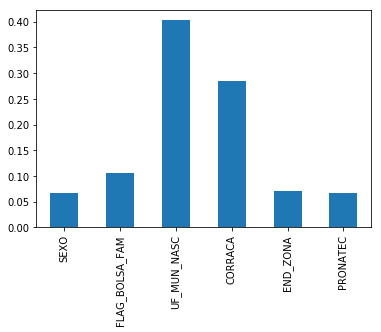

In [202]:
pd.Series(model.feature_importances_, index=cols_usadas).plot(kind='bar')

In [208]:
with open('xgboost','wb') as file:
    pickle.dump(model, file)